In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("train_heat.csv")
#열이름빼기
df.columns = df.columns.str.replace('train_heat.', '', regex=False)
#Unnamed:0제거
df = df.drop(columns=["Unnamed: 0"])

df['tm'] = pd.to_datetime(df['tm'], format='%Y%m%d%H')
# 1. si: 08~18시가 아닐 때 -99는 0으로
mask_outside_8_to_18 = (~df['tm'].dt.hour.between(8, 18)) & (df['si'] == -99)
df.loc[mask_outside_8_to_18, 'si'] = 0

# 2. wd에서 9.9는 NaN으로
df['wd'] = df['wd'].replace(9.9, np.nan)

# 3. -99 처리
df.replace(-99, np.nan, inplace=True)

df = df.interpolate(method='linear', limit_direction='both')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3172\1420032814.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', limit_direction='both')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tm           499301 non-null  datetime64[ns]
 1   branch_id    499301 non-null  object        
 2   ta           499301 non-null  float64       
 3   wd           499301 non-null  float64       
 4   ws           499301 non-null  float64       
 5   rn_day       499301 non-null  float64       
 6   rn_hr1       499301 non-null  float64       
 7   hm           499301 non-null  float64       
 8   si           499301 non-null  float64       
 9   ta_chi       499301 non-null  float64       
 10  heat_demand  499301 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 41.9+ MB


In [1]:
import matplotlib.pyplot as plt
import numpy as np

branches = df['branch_id'].unique()
n_branch = len(branches)
ncols = 2  # 한 줄에 2개씩
nrows = int(np.ceil(n_branch / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(7 * ncols, 3.5 * nrows), sharex=False, sharey=False)
axes = axes.flatten()  # 2차원 배열을 1차원으로

for i, branch in enumerate(branches):
    branch_df = df[df['branch_id'] == branch].copy()
    ax = axes[i]
    ax.plot(branch_df['tm'], branch_df['heat_demand'], marker='o', color='tab:blue', linewidth=1, markersize=2, label=f'Branch {branch}')
    ax.set_title(f'Branch {branch}', fontsize=12)
    ax.set_xlabel('Time', fontsize=10)
    ax.set_ylabel('Heat Demand', fontsize=10)
    # 듬성듬성 x축
    step = max(1, len(branch_df) // 8)
    tick_idx = np.arange(0, len(branch_df), step)
    tick_locs = branch_df['tm'].iloc[tick_idx]
    tick_labels = tick_locs.dt.strftime('%Y-%m-%d\n%H:%M')
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labels, rotation=45, fontsize=8)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.7)
    ax.legend(fontsize=9)
    # y축 폰트 작게
    ax.tick_params(axis='y', labelsize=8)

# 남는 subplot은 숨기기
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

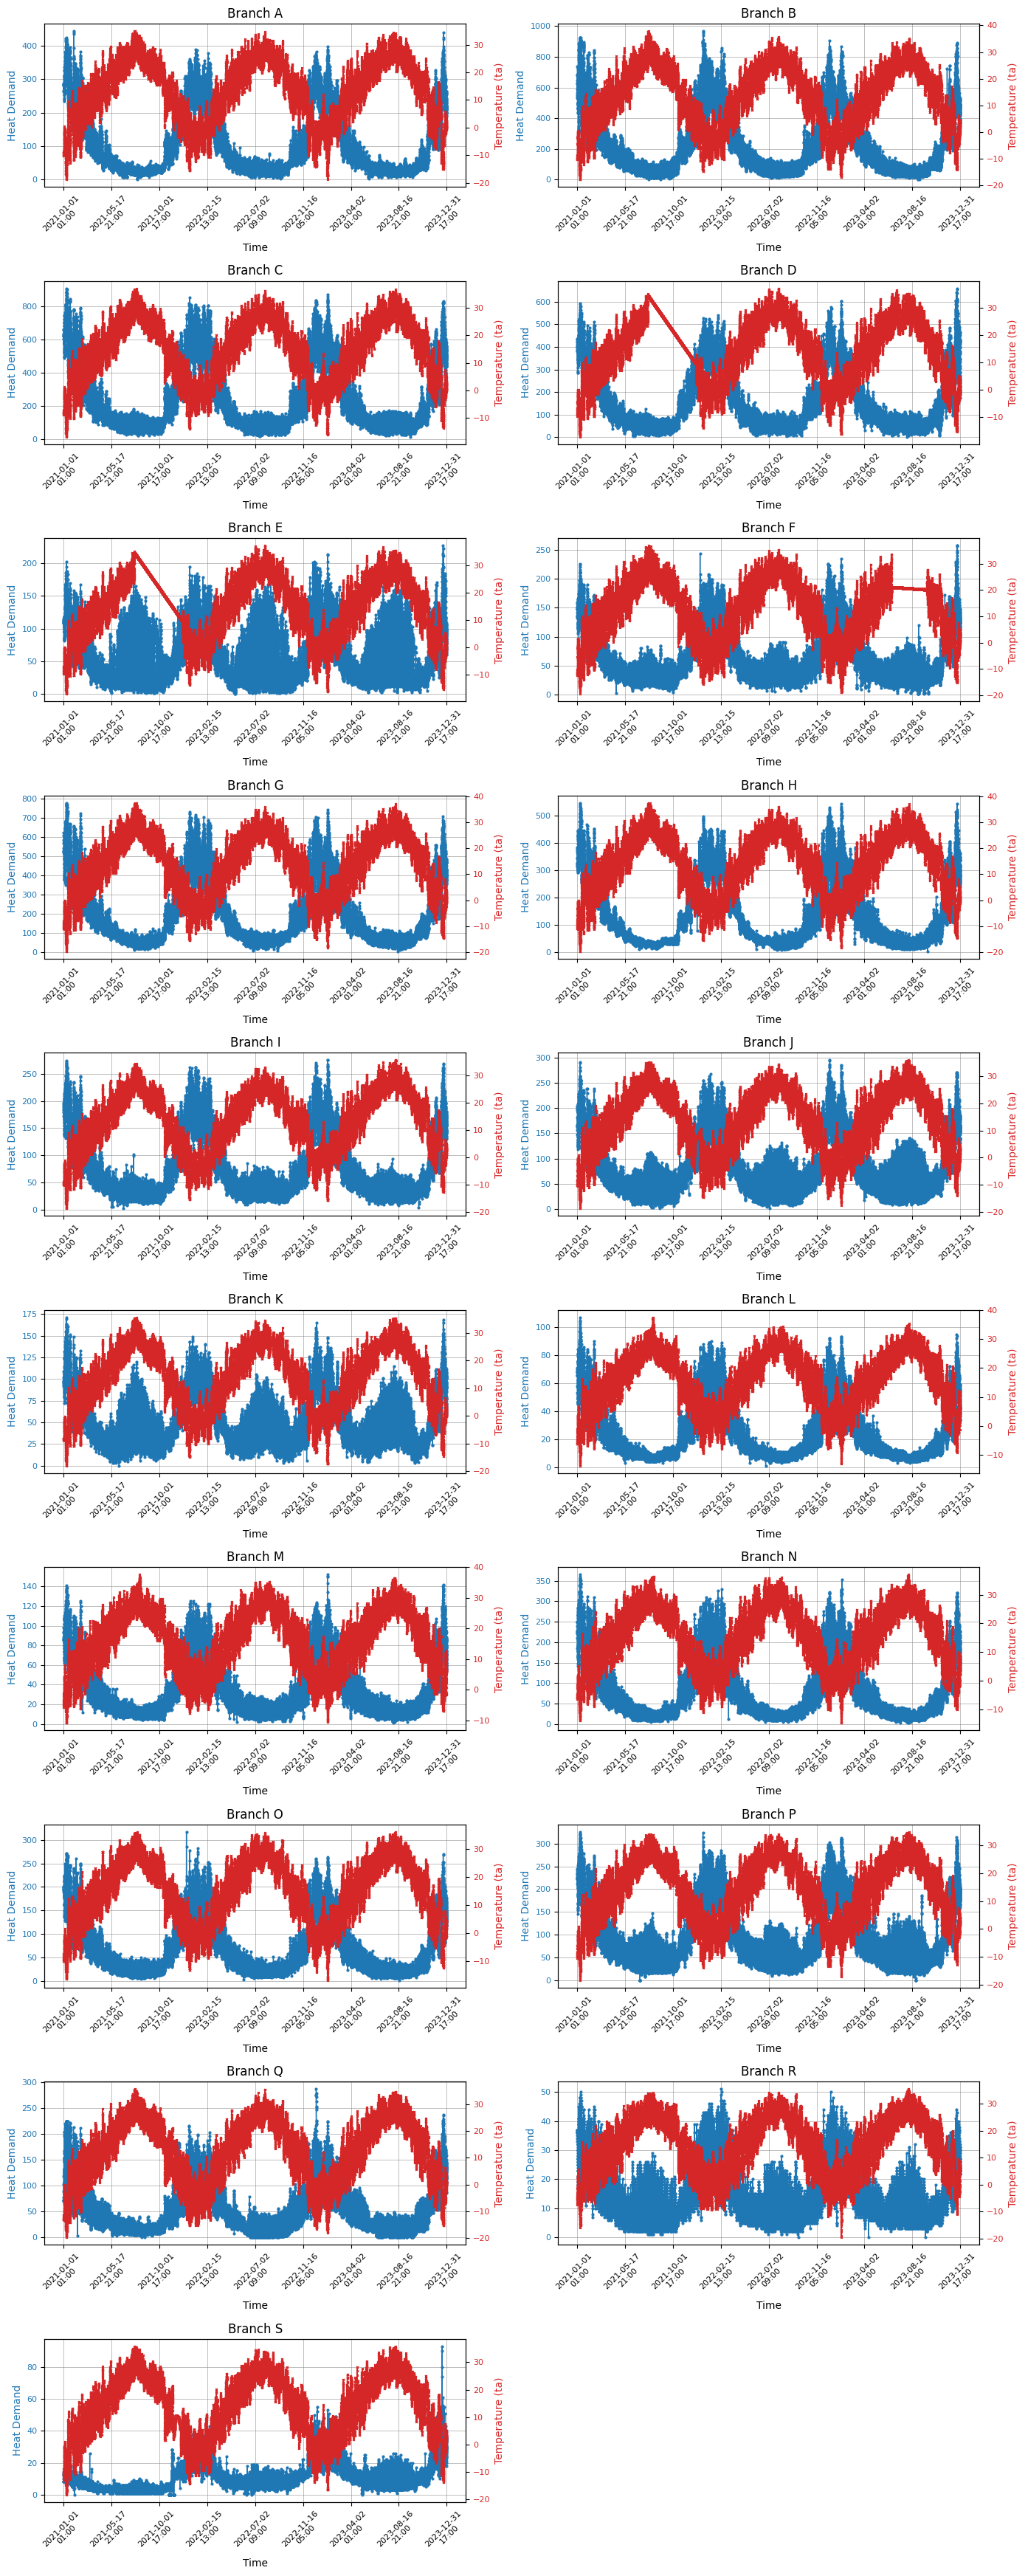

In [15]:
import matplotlib.pyplot as plt
import numpy as np

branches = df['branch_id'].unique()
n_branch = len(branches)
ncols = 2  # 한 줄에 2개씩
nrows = int(np.ceil(n_branch / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(7 * ncols, 3.5 * nrows), sharex=False, sharey=False)
axes = axes.flatten()  # 2차원 배열을 1차원으로

for i, branch in enumerate(branches):
    branch_df = df[df['branch_id'] == branch].copy()
    ax = axes[i]
    # 왼쪽 y축: heat_demand
    ax.plot(branch_df['tm'], branch_df['heat_demand'], marker='o', color='tab:blue', linewidth=1, markersize=2, label='Heat Demand')
    ax.set_ylabel('Heat Demand', fontsize=10, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue', labelsize=8)
    ax.set_title(f'Branch {branch}', fontsize=12)
    ax.set_xlabel('Time', fontsize=10)
    # 듬성듬성 x축
    step = max(1, len(branch_df) // 8)
    tick_idx = np.arange(0, len(branch_df), step)
    tick_locs = branch_df['tm'].iloc[tick_idx]
    tick_labels = tick_locs.dt.strftime('%Y-%m-%d\n%H:%M')
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labels, rotation=45, fontsize=8)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.7)
    # 오른쪽 y축: ta(온도)
    ax2 = ax.twinx()
    ax2.plot(branch_df['tm'], branch_df['ta'], marker='x', color='tab:red', linewidth=1, markersize=2, label='Temperature (ta)')
    ax2.set_ylabel('Temperature (ta)', fontsize=10, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=8)
    # 범례(왼쪽/오른쪽 y축 모두)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

# 남는 subplot은 숨기기
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

branches = 'B'  # 원하는 브랜치만 선택
n_branch = len(branches)
ncols = 2
nrows = int(np.ceil(n_branch / ncols))

fig = make_subplots(
    rows=nrows, cols=ncols,
    specs=[[{"secondary_y": True} for _ in range(ncols)] for _ in range(nrows)],
    subplot_titles=[f"Branch {branch}" for branch in branches]
)

for i, branch in enumerate(branches):
    branch_df = df[df['branch_id'] == branch]
    row = i // ncols + 1
    col = i % ncols + 1

    # heat_demand (왼쪽 y축)
    fig.add_trace(
        go.Scatter(
            x=branch_df['tm'], y=branch_df['heat_demand'],
            mode='lines+markers',
            marker=dict(size=4, symbol='circle', color='blue'),
            line=dict(width=1, color='blue'),
            name='Heat Demand',
            showlegend=(i==0)  # 첫 플롯에만 범례 표시
        ),
        row=row, col=col, secondary_y=False
    )

    # ta (오른쪽 y축)
    fig.add_trace(
        go.Scatter(
            x=branch_df['tm'], y=branch_df['ta'],
            mode='lines+markers',
            marker=dict(size=4, symbol='x', color='red'),
            line=dict(width=1, color='red'),
            name='Temperature (ta)',
            showlegend=(i==0)  # 첫 플롯에만 범례 표시
        ),
        row=row, col=col, secondary_y=True
    )

    # x축 간격을 8개 정도로 제한하고 싶으면 tickvals, ticktext 직접 지정 가능
    step = max(1, len(branch_df) // 8)
    tick_idx = np.arange(0, len(branch_df), step)
    tick_vals = branch_df['tm'].iloc[tick_idx]
    tick_texts = tick_vals.dt.strftime('%Y-%m-%d\n%H:%M')

    fig.update_xaxes(
        row=row, col=col,
        tickvals=tick_vals,
        ticktext=tick_texts,
        tickangle=45,
        showgrid=True,
        gridwidth=0.5,
        gridcolor='gray',
        zeroline=False
    )

    fig.update_yaxes(
        title_text='Heat Demand',
        row=row, col=col,
        secondary_y=False,
        title_font=dict(color='blue'),
        tickfont=dict(color='blue')
    )
    fig.update_yaxes(
        title_text='Temperature (ta)',
        row=row, col=col,
        secondary_y=True,
        title_font=dict(color='red'),
        tickfont=dict(color='red')
    )

fig.update_layout(
    height=350 * nrows,
    width=700 * ncols,
    title_text="Heat Demand and Temperature (ta) by Branch",
    legend=dict(y=1.02, x=1),
    margin=dict(t=50)
)

fig.show()

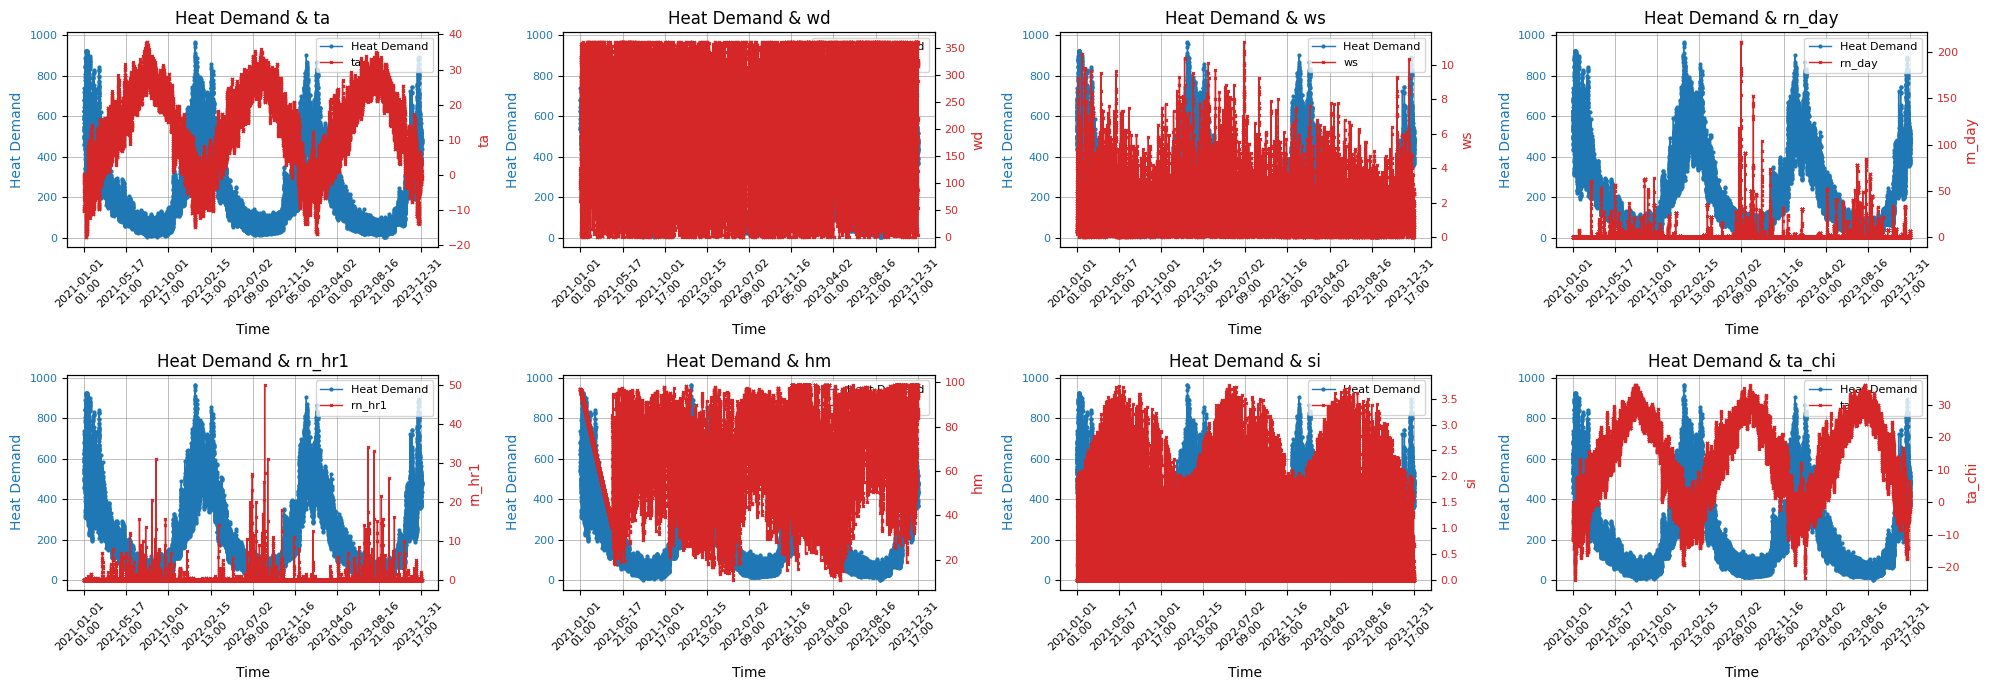

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 사용할 변수 리스트
y_vars = ['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi']
n_plots = len(y_vars)

# branch_id가 'B'인 데이터만 사용
branch_df = df[df['branch_id'] == 'B'].copy()

ncols = 4
nrows = int(np.ceil(n_plots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3.5 * nrows), sharex=False)
axes = axes.flatten()

# x축 tick 설정 (듬성듬성)
step = max(1, len(branch_df) // 8)
tick_idx = np.arange(0, len(branch_df), step)
tick_locs = branch_df['tm'].iloc[tick_idx]
tick_labels = tick_locs.dt.strftime('%Y-%m-%d\n%H:%M')

for i, y in enumerate(y_vars):
    ax = axes[i]
    # 왼쪽 y축: heat_demand
    ax.plot(branch_df['tm'], branch_df['heat_demand'], marker='o', color='tab:blue', linewidth=1, markersize=2, label='Heat Demand')
    ax.set_ylabel('Heat Demand', fontsize=10, color='tab:blue')
    ax.tick_params(axis='y', labelcolor='tab:blue', labelsize=8)
    ax.set_title(f'Heat Demand & {y}', fontsize=12)
    ax.set_xlabel('Time', fontsize=10)
    ax.set_xticks(tick_locs)
    ax.set_xticklabels(tick_labels, rotation=45, fontsize=8)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.3, color='lightgray', alpha=0.7)
    # 오른쪽 y축: 해당 변수
    ax2 = ax.twinx()
    ax2.plot(branch_df['tm'], branch_df[y], marker='x', color='tab:red', linewidth=1, markersize=2, label=y)
    ax2.set_ylabel(y, fontsize=10, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=8)
    # 범례(왼쪽/오른쪽 y축 모두)
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=8)

# 남는 subplot은 숨기기
for j in range(n_plots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()